## 📥 Load Dataset

We are loading the processed insurance dataset `MachineLearningRating_v3.csv` into a Pandas DataFrame.  
This allows us to inspect the structure of the data, check column names, and perform further analysis.

- `file_path` points to the location of the CSV file.
- `df.head()` displays the first few rows for a quick check.


In [1]:
import pandas as pd

# Load the CSV
file_path = '../data/processed/MachineLearningRating_v3.csv'  # adjust path if needed
df = pd.read_csv(file_path)

# Quick check
df.head()


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## 🗂️ Explore Dataset

We perform an initial exploration of the dataset to understand its structure and quality:

1. **Shape of dataset** – Number of rows and columns.
2. **Column info** – Data types and non-null counts.
3. **Missing values** – Check if there are any null/missing entries.
4. **Basic statistics** – Summary of numeric columns (mean, min, max, etc.) to understand distributions.


In [2]:
# Shape of dataset
print("Rows, Columns:", df.shape)

# Column info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Basic statistics for numeric columns
print(df.describe())


Rows, Columns: (256960, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256960 entries, 0 to 256959
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UnderwrittenCoverID       256960 non-null  int64  
 1   PolicyID                  256960 non-null  int64  
 2   TransactionMonth          256960 non-null  object 
 3   IsVATRegistered           256960 non-null  bool   
 4   Citizenship               0 non-null       float64
 5   LegalType                 256960 non-null  object 
 6   Title                     256960 non-null  object 
 7   Language                  256960 non-null  object 
 8   Bank                      224103 non-null  object 
 9   AccountType               227078 non-null  object 
 10  MaritalStatus             256960 non-null  object 
 11  Gender                    256960 non-null  object 
 12  Country                   256960 non-null  object 
 13  Province        

## 📊 Visualize Key Numeric Features

We visualize the distribution of some important numeric columns in the dataset:

- **TotalClaims** – To understand the frequency and spread of claims made by policyholders.  
- **TotalPremium** – To see the distribution of premiums across policies.  

Histograms are used to give a clear picture of how the data is distributed, and to detect potential outliers or skewness.


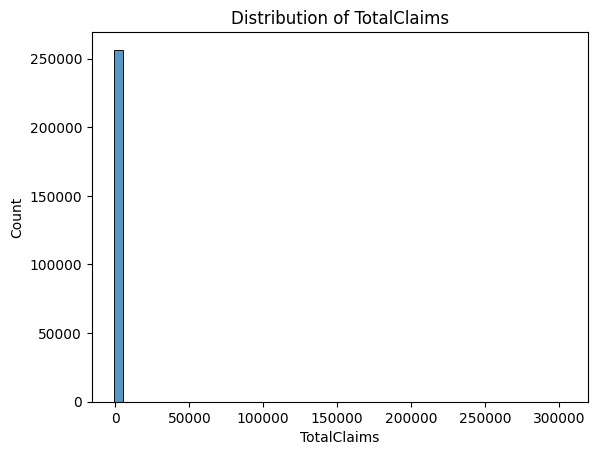

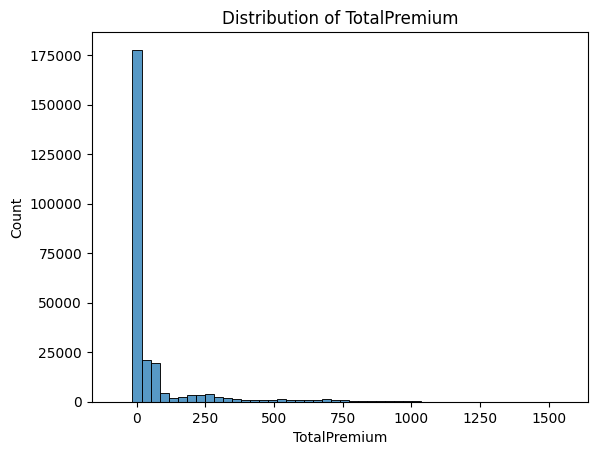

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: TotalClaims distribution
sns.histplot(df['TotalClaims'], bins=50)
plt.title("Distribution of TotalClaims")
plt.show()

# Example: TotalPremium distribution
sns.histplot(df['TotalPremium'], bins=50)
plt.title("Distribution of TotalPremium")
plt.show()


## 👥 Categorical Feature Counts

We visualize the counts of key categorical variables:

- **Gender** – To understand the distribution of policyholders by gender.  
- **Province** – To see how policies are distributed across different provinces.  

Countplots give a clear picture of frequency for each category and help identify class imbalances.


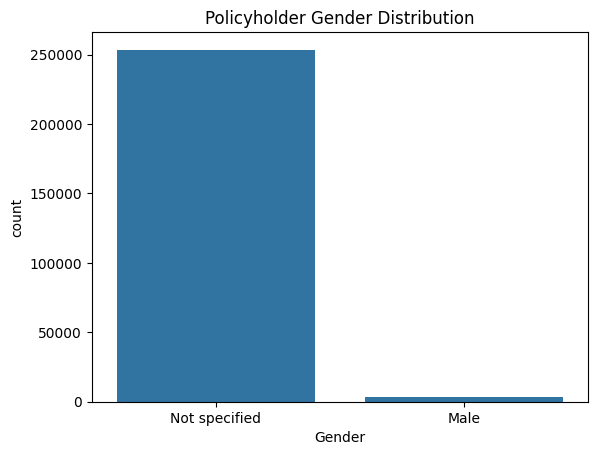

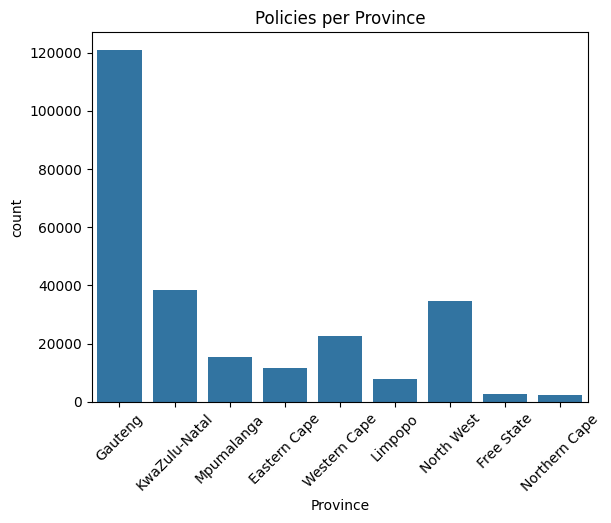

In [4]:
# Example: Gender counts
sns.countplot(x='Gender', data=df)
plt.title("Policyholder Gender Distribution")
plt.show()

# Example: Province counts
sns.countplot(x='Province', data=df)
plt.xticks(rotation=45)
plt.title("Policies per Province")
plt.show()


## 💹 Relationships and Ratios

We explore the relationship between numeric variables and calculate a derived metric:

- **TotalPremium vs TotalClaims** – Scatter plot to examine how the premiums collected relate to claims made.  
- **LossRatio by Province** – Boxplot of `LossRatio` (TotalClaims ÷ TotalPremium) to see which provinces have higher claim ratios.


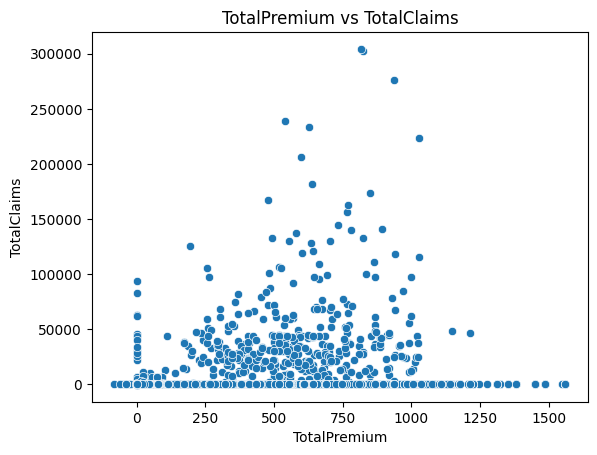

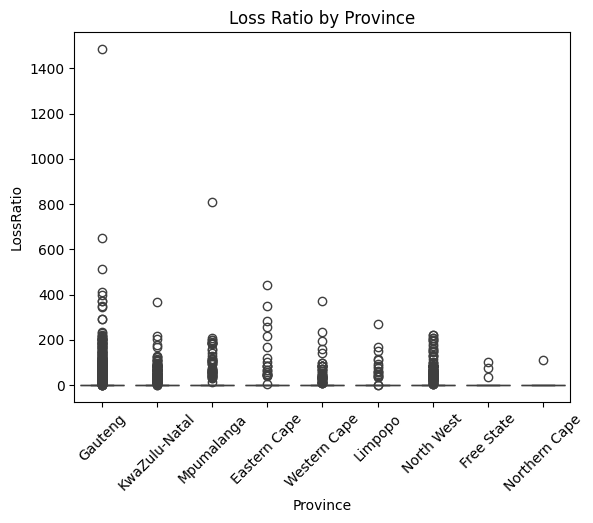

In [5]:
# TotalPremium vs TotalClaims
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df)
plt.title("TotalPremium vs TotalClaims")
plt.show()

# Loss ratio by Province
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
sns.boxplot(x='Province', y='LossRatio', data=df)
plt.xticks(rotation=45)
plt.title("Loss Ratio by Province")
plt.show()


## 📦 Outlier Analysis

We use boxplots to identify potential outliers in key numeric variables:

- **TotalClaims** – Helps visualize unusually high or low claim amounts.  
- **CustomValueEstimate** – Shows outliers in estimated custom values, which may affect analysis or model performance.


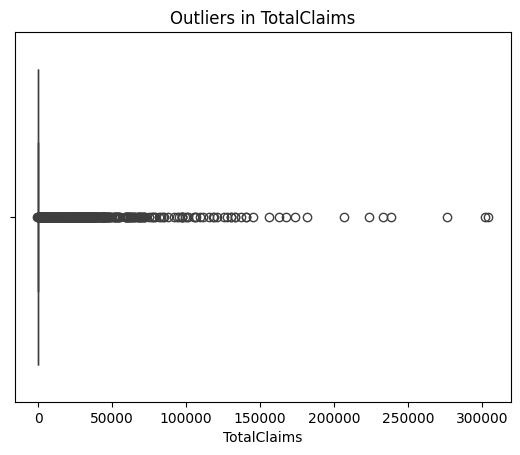

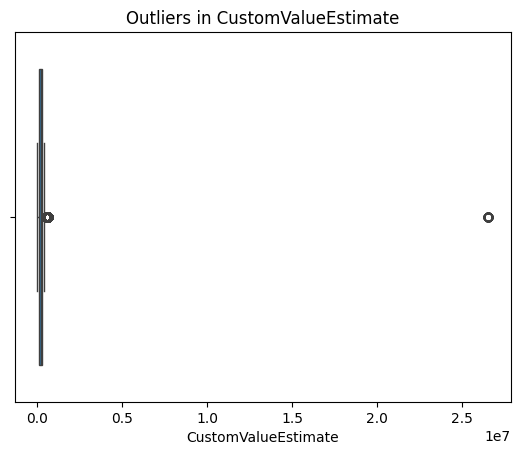

In [6]:
# Boxplot for TotalClaims
sns.boxplot(x=df['TotalClaims'])
plt.title("Outliers in TotalClaims")
plt.show()

# Boxplot for CustomValueEstimate
sns.boxplot(x=df['CustomValueEstimate'])
plt.title("Outliers in CustomValueEstimate")
plt.show()


## 💾 Save Loss Ratio by Province

We calculate the **average LossRatio per Province** to summarize risk levels geographically.  
The results are saved as a CSV file for further reporting or analysis.


In [7]:
# Save loss ratio by province
loss_ratio = df.groupby('Province')['LossRatio'].mean()
loss_ratio.to_csv('../reports/loss_ratio_by_province.csv')
